# Predicting a Player’s position based on the attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the Dataset
fifa=pd.read_csv('C:\\Users\\lenovo\\Downloads\\data (1).csv',index_col=0)
fifa.shape

(18207, 88)

# Basic Dataset Details

In [3]:
print('Total Row: ', fifa.shape[0])
print('Total Columns: ', fifa.shape[1])
print('Column Name: ', fifa.columns)

Total Row:  18207
Total Columns:  88
Column Name:  Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       '

In [4]:
fifa.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# 1 : Data Cleaning

In [5]:
# Require Features as per the Probelm statement like name & ID same hence , i am going to take ID because its already in 
# numerical form , also photo,Flag , club,club logo and nationality not important feature for the position also here i am removing 
# Loaned From because its have a lot of NA values
require_feature=['ID','Age','Overall',
       'Potential','Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined','Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
fifa_1=fifa[require_feature]

In [6]:
fifa_1.shape

(18207, 81)

In [7]:
fifa_1.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,€110.5M,€565K,2202,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,33,94,94,€77M,€405K,2228,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,26,92,93,€118.5M,€290K,2143,Right,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,27,91,93,€72M,€260K,1471,Right,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,27,91,92,€102M,€355K,2281,Right,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
# 1. Data Cleaning
# Find out NA values and outliers
fifa_1.isna().sum().sort_values()

ID                         0
Age                        0
Overall                    0
Potential                  0
Value                      0
Wage                       0
Special                    0
Reactions                 48
Balance                   48
ShotPower                 48
Jumping                   48
LongShots                 48
Strength                  48
GKReflexes                48
Aggression                48
Stamina                   48
Agility                   48
BallControl               48
Acceleration              48
Interceptions             48
LongPassing               48
Crossing                  48
Finishing                 48
HeadingAccuracy           48
ShortPassing              48
Volleys                   48
Dribbling                 48
SprintSpeed               48
Positioning               48
Marking                   48
                        ... 
Position                  60
Contract Valid Until     289
Joined                  1553
Release Clause

In [9]:
# Function for replacing the NA value with there mean and mode in the basis of value categorical or numerical  
for i in fifa_1.columns:
    if fifa_1[i].dtype == 'object':
        mode_val = fifa_1[i].mode()
        fifa_1.loc[fifa_1[i].isnull(),i] = mode_val[0]
        
    elif fifa_1[i].dtype=='float64':
        mean_val = fifa_1[i].mean()
        fifa_1.loc[fifa_1[i].isnull(),i] = mean_val
     
    else:
        pass

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# check the any NA value available or not
fifa_1.isna().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
                           ..
Dribbling                   0
Curve                       0
FKAccuracy

# 2. Features considered for EDA and further steps.

In [11]:
fifa_1.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.355759,-0.075693,-0.056845,0.181805,-0.131834,...,-0.140486,-0.384007,-0.110064,-0.085825,-0.068326,-0.105466,-0.111014,-0.106523,-0.118107,-0.105650
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253464,0.059796,0.027616,-0.240751,0.130391,...,0.139370,0.390560,0.142647,0.119603,0.102967,0.101157,0.106293,0.104839,0.116264,0.103190
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499243,0.211910,0.414257,-0.218709,0.394776,...,0.341259,0.727293,0.286363,0.252503,0.222700,-0.025924,-0.025049,-0.029358,-0.017666,-0.023264
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372375,0.162077,0.353703,-0.010450,0.245911,...,0.223909,0.439279,0.162531,0.143326,0.128766,-0.053357,-0.054581,-0.058964,-0.052502,-0.053252
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292118,0.341751,0.763178,-0.133641,0.866151,...,0.734307,0.752100,0.561694,0.538637,0.506812,-0.674429,-0.673418,-0.670048,-0.668067,-0.673031
International Reputation,-0.355759,0.253464,0.499243,0.372375,0.292118,1.000000,0.128317,0.208153,-0.077296,0.191770,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075693,0.059796,0.211910,0.162077,0.341751,0.128317,1.000000,0.340721,-0.035401,0.307925,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056845,0.027616,0.414257,0.353703,0.763178,0.208153,0.340721,1.000000,-0.035187,0.741035,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.181805,-0.240751,-0.218709,-0.010450,-0.133641,-0.077296,-0.035401,-0.035187,1.000000,-0.076558,...,-0.028012,-0.167482,-0.142398,-0.133239,-0.124562,0.004806,0.001543,0.001162,-0.002735,0.003254
Crossing,-0.131834,0.130391,0.394776,0.245911,0.866151,0.191770,0.307925,0.741035,-0.076558,1.000000,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539


In [12]:
# As per above correlation , not all features are highly correlated 

we can see large number of group age in between 20 to 27 , their contribution are more than the others

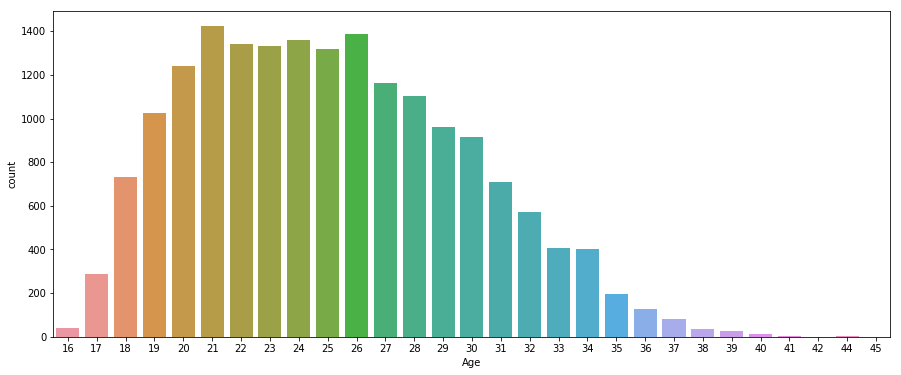

In [13]:
# Distribution Of Age
plt.figure(figsize=(15,6))
sns.countplot(x='Age' ,data=fifa_1);

In [14]:
# As per the observation lets consider the require column for the 'Player Position' on the basis of physical and Technical Feature
#fifa_1['Strength'].value_counts()
#fifa_1['Real Face'].value_counts()
# cheked for various features and select only relevent features

# 3 Exploratory Data Analysis Undertaken

In [15]:
# Gather only columns that we need for this analysis purpose...like no use of their Join date international reputation etc
#height & weight removed
fifa_2=['ID','Age','Overall',
       'Potential','Special','Weak Foot',
       'Skill Moves','Position','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
fifa_1=fifa_1[fifa_2]

In [16]:
fifa_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 42 columns):
ID                 18207 non-null int64
Age                18207 non-null int64
Overall            18207 non-null int64
Potential          18207 non-null int64
Special            18207 non-null int64
Weak Foot          18207 non-null float64
Skill Moves        18207 non-null float64
Position           18207 non-null object
Crossing           18207 non-null float64
Finishing          18207 non-null float64
HeadingAccuracy    18207 non-null float64
ShortPassing       18207 non-null float64
Volleys            18207 non-null float64
Dribbling          18207 non-null float64
Curve              18207 non-null float64
FKAccuracy         18207 non-null float64
LongPassing        18207 non-null float64
BallControl        18207 non-null float64
Acceleration       18207 non-null float64
SprintSpeed        18207 non-null float64
Agility            18207 non-null float64
Reactions          1

In [17]:
# function which changes position from goolkeeper to 1, defender to 2, midfielder to 3, striker to 4.
def simplePosition(col):
    if (col == 'GK'):
        return 1
    elif ((col == 'RB') | (col == 'LB') | (col == 'CB') | (col == 'LCB') | (col == 'RCB') | (col == 'RWB') | (col == 'LWB') ):
        return 2
    elif ((col == 'LDM') | (col == 'CDM') | (col == 'RDM') | (col == 'LM') | (col == 'LCM') | 
          (col == 'CM') | (col == 'RCM') | (col == 'RM') | (col == 'LAM') | (col == 'CAM') | 
          (col == 'RAM') | (col == 'LW') | (col == 'RW')):
        return 3
    elif ((col == 'RS') | (col == 'ST') | (col == 'LS') | (col == 'CF') | (col == 'LF') | (col == 'RF')):
        return 4
    else:
        return 'error'

In [18]:
fifa_1["Position"] = fifa_1.Position.apply(simplePosition)

In [19]:
fifa_1.shape

(18207, 42)

In [20]:
fifa_1['Position'].value_counts()
#goolkeeper=1, 
#defender=2
#midfielder=3
#striker=4

3    7589
2    5866
4    2727
1    2025
Name: Position, dtype: int64

# Processed Data

In [356]:
fifa_1.to_csv('C:\\Users\\sif-2880\\Downloads\\fifa_final.csv')

In [21]:
#Scale The Features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler.fit(fifa_1.drop(['Position','ID'], axis=1))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

# Find out important Features from RandomForestClassifier

In [23]:
x1=fifa_1.drop(["Position"],axis=1)
y1=fifa_1["Position"]

In [24]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(x1, y1) 

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
# Feature Importance for Brand 1
feature_importances_brand1 = pd.DataFrame(rf.feature_importances_,
                                   index = x1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_brand1.head(25)

,importance
Finishing,0.105908
HeadingAccuracy,0.083376
SlidingTackle,0.068333
GKKicking,0.064223
Crossing,0.061586
Marking,0.057499
Interceptions,0.047924
Vision,0.046259
LongPassing,0.031092
BallControl,0.030932


# 4.Inference from EDA

from above analysis we can say that various feature which are playing important role into the Position SlidingTackle,Finishing,Crossing,Vision,Interceptions,HeadingAccuracy,GKDiving,StandingTackle,LongPassing
Dribbling,Positioning,ShortPassing

# 5 .Choice of Best Algorithm and Why

This is classification Problem hence we have to select the supervised machine learing algorithm:

we are going to compare two models and try to find best one , than by using grid search tune the hyperparameter and put that  best hyperparameter value  into the original model

(1) KNN 
(2) RandomForestClassifier 
(3) Decision Tree

In [34]:
# Test and train Split 
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

# KNN classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

# Reports 

In [38]:
# Import Library 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 

In [40]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.7353

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96      1603
           2       0.74      0.73      0.74      4753
           3       0.68      0.83      0.75      6022
           4       0.80      0.29      0.43      2187

   micro avg       0.74      0.74      0.74     14565
   macro avg       0.79      0.71      0.72     14565
weighted avg       0.75      0.74      0.72     14565


Confusion Matrix: 
 [[1547   44   11    1]
 [  47 3492 1188   26]
 [  12  845 5027  138]
 [  10  354 1179  644]]

Average Accuracy: 	 0.6514
Accuracy SD: 		 0.0098


In [41]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.6494

Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93       422
           2       0.61      0.61      0.61      1113
           3       0.62      0.76      0.68      1567
           4       0.57      0.19      0.29       540

   micro avg       0.65      0.65      0.65      3642
   macro avg       0.69      0.62      0.63      3642
weighted avg       0.65      0.65      0.63      3642


Confusion Matrix: 
 [[ 386   31    5    0]
 [  12  678  414    9]
 [   4  295 1197   71]
 [   3  114  319  104]]



# My Model Not Giving Better Result lets try out Grid Search for that

In [42]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [43]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params,n_jobs=-1,verbose=1)
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [44]:
grid_search_cv.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [45]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1603
           2       1.00      1.00      1.00      4753
           3       1.00      1.00      1.00      6022
           4       1.00      1.00      1.00      2187

   micro avg       1.00      1.00      1.00     14565
   macro avg       1.00      1.00      1.00     14565
weighted avg       1.00      1.00      1.00     14565


Confusion Matrix: 
 [[1603    0    0    0]
 [   0 4753    0    0]
 [   0    0 6022    0]
 [   0    0    0 2187]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.7s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy: 	 0.6794
Accuracy SD: 		 0.0091


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished


In [47]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.6683

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97       422
           2       0.65      0.67      0.66      1113
           3       0.64      0.64      0.64      1567
           4       0.54      0.50      0.52       540

   micro avg       0.67      0.67      0.67      3642
   macro avg       0.70      0.70      0.70      3642
weighted avg       0.67      0.67      0.67      3642


Confusion Matrix: 
 [[ 407   10    2    3]
 [   3  749  336   25]
 [   3  350 1006  208]
 [   1   50  217  272]]



# Grid Search also not giving good accuracy lets go for RandomForestClassifier

# RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf = RandomForestClassifier(random_state=42,max_leaf_nodes=2,min_samples_split=5,n_estimators=25)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.5235



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1603
           2       0.00      0.00      0.00      4753
           3       0.46      1.00      0.63      6022
           4       0.00      0.00      0.00      2187

   micro avg       0.52      0.52      0.52     14565
   macro avg       0.37      0.50      0.41     14565
weighted avg       0.30      0.52      0.37     14565


Confusion Matrix: 
 [[1603    0    0    0]
 [   0    0 4753    0]
 [   0    0 6022    0]
 [   1    0 2186    0]]

Average Accuracy: 	 0.5235
Accuracy SD: 		 0.0002


# Underfit happeing in RandomClassifier

# 3. DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,max_depth=10,max_leaf_nodes=20)
clf = clf.fit(X_train,y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8582

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1603
           2       0.87      0.85      0.86      4753
           3       0.81      0.86      0.83      6022
           4       0.86      0.77      0.81      2187

   micro avg       0.86      0.86      0.86     14565
   macro avg       0.89      0.87      0.88     14565
weighted avg       0.86      0.86      0.86     14565


Confusion Matrix: 
 [[1603    0    0    0]
 [   0 4053  696    4]
 [   0  592 5158  272]
 [   1   16  485 1685]]

Average Accuracy: 	 0.8507
Accuracy SD: 		 0.0088


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,max_depth=10,max_leaf_nodes=20)
clf = clf.fit(X_train,y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8506

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       422
           2       0.84      0.84      0.84      1113
           3       0.82      0.84      0.83      1567
           4       0.87      0.78      0.82       540

   micro avg       0.85      0.85      0.85      3642
   macro avg       0.88      0.87      0.87      3642
weighted avg       0.85      0.85      0.85      3642


Confusion Matrix: 
 [[ 422    0    0    0]
 [   0  934  179    0]
 [   0  181 1321   65]
 [   0    2  117  421]]



# Prediction
**Excel Sheet of the Test set With Player Details,      Predicted Position  and     Actual Position

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14565, 41), (14565,), (3642, 41), (3642,))

In [67]:
fifa_1.shape

(18207, 42)

In [68]:
fifa['Position']=final_pred

NameError: name 'final_pred' is not defined

In [387]:
final_pred

array([1, 4, 1, ..., 4, 2, 2], dtype=int64)

In [64]:
datafinal=pd.DataFrame({'Player name':fifa['Name'],'Actual':fifa['Position'],'Predicted':final_pred})

NameError: name 'final_pred' is not defined

In [55]:
import pickle

In [56]:
clf = DecisionTreeClassifier(random_state=42,max_depth=10,max_leaf_nodes=20)
clf.fit(X_train,y_train)
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [61]:
def driver_code(X_test, y_test):# load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    print(result)

In [62]:
driver_code(X_test,y_test)

0.8506315211422295
